In [42]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# 读取 CSV 文件并存储在 Pandas DataFrame 中
df = pd.read_csv("movie.csv", encoding="Big5", names=["name", "year", "box"])

# 删除包含 NaN 值的行
df = df.dropna()

# 将 'box' 列转换为数值型数据（整数或浮点数）
df['box'] = pd.to_numeric(df['box'], errors='coerce')

# 删除包含 NaN 值的行
df = df.dropna()

# 将 DataFrame 转换为 JSON 格式
disney = []
for index, row in df.iterrows():
    disney.append({
        "name": row["name"],
        "year": int(row["year"]),  # 转换为整数类型
        "box": int(row["box"])      # 转换为整数类型
    })

# 将 JSON 数据写入文件
with open("disney.json", "w", encoding="utf-8") as json_file:
    json.dump(disney, json_file, indent=4, ensure_ascii=False)


In [45]:

# 找出票房前五名的电影
top_five_movies = df.nlargest(5, "box")
print("票房前五名的电影是：")
for index, row in top_five_movies.iterrows():
    print(row["name"])


票房前五名的电影是：
獅子王
美女與野獸
阿拉丁
魔境夢遊
與森林共舞


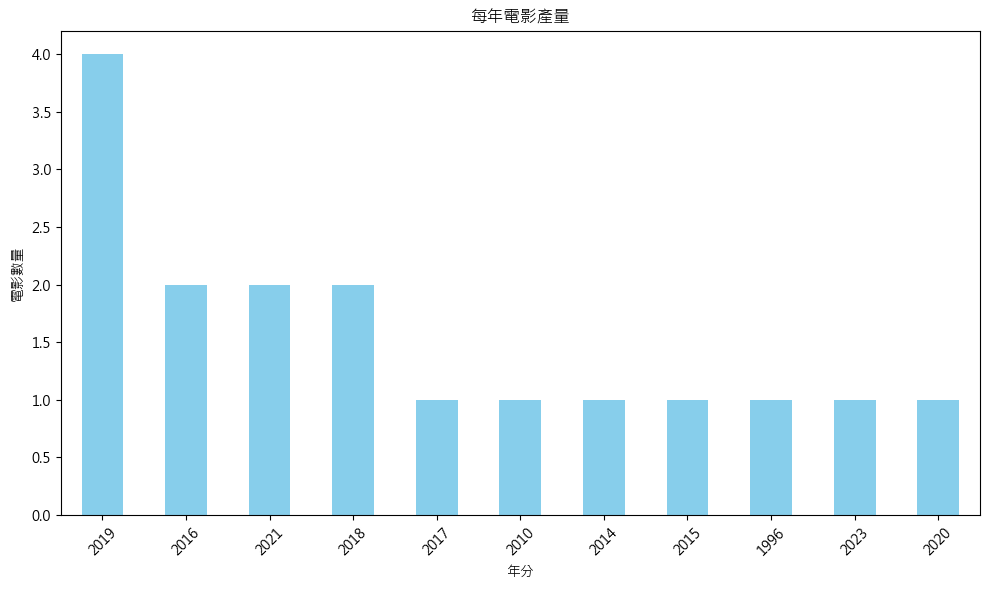

電影生產量最多的一年是: 2019
電影數量為: 4
電影名是: ['獅子王' '阿拉丁' '黑魔女2' '小飛象']


In [44]:
    
# 找出哪一年电影生產量最多，分別是哪幾部作品

# 统计每个年份出现的次数
year_counts = df['year'].value_counts()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('年分')
plt.ylabel('電影數量')
plt.title('每年電影產量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 找到具有最大计数的年份
most_common_year = year_counts.idxmax()


# 筛选出拥有最多电影数量的年份的所有电影
movies_in_most_common_year = df[df['year'] == most_common_year]

# 找到前四个电影的名称
top_four_movies = movies_in_most_common_year.head(4)

print("電影生產量最多的一年是:", most_common_year)
print("電影數量為:", year_counts[most_common_year])
print("電影名是:",top_four_movies['name'].values)


In [46]:

#仙履奇緣在全部資料中排名第幾，哪一年上映的，以及票房為多少

cinderella_df = df[df['name'] == '仙履奇緣']

if not cinderella_df.empty:
    # 找到《仙履奇缘》的排名、上映年份和票房
    ranking = cinderella_df.index[0] + 1  # 加1是因为索引是从0开始的
    yeardata = cinderella_df['year'].iloc[0]
    box_office = cinderella_df['box'].iloc[0]

    print("電影《仙履奇缘》在全部數據中的排名:", ranking)
    print("上映年份:", yeardata)
    print("票房:", box_office)
else:
    print("未找到電影《仙履奇缘》的相關信息。")


電影《仙履奇缘》在全部數據中的排名: 8
上映年份: 2015
票房: 168.0
